In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


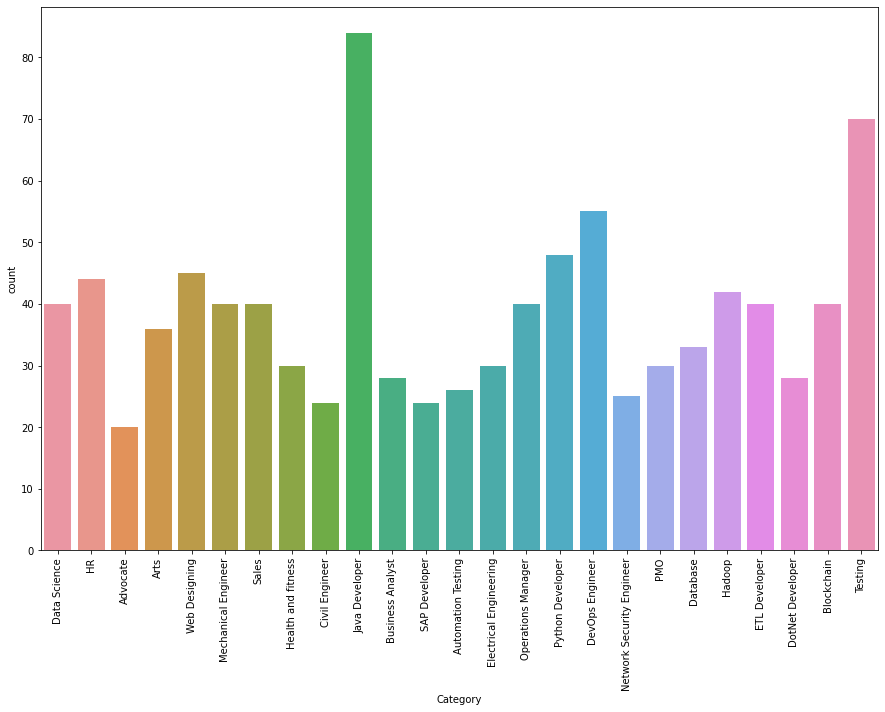

In [6]:
plt.figure(figsize = [15, 10])
sns.countplot(df['Category'])
plt.xticks(rotation = 90)
plt.show()

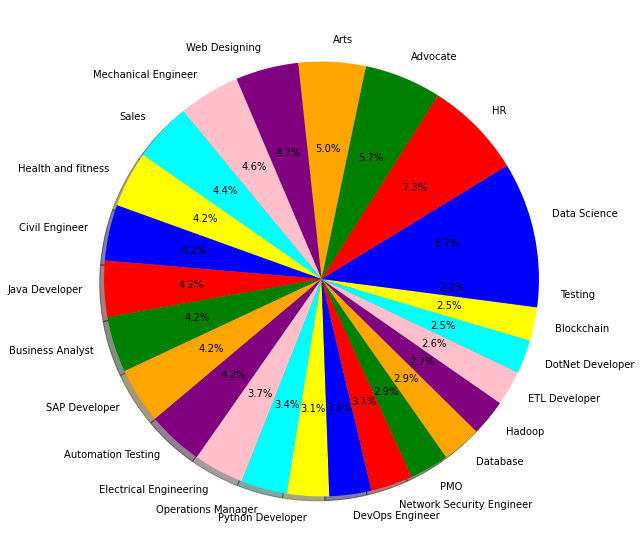

In [9]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

# Define a list of colors (you can customize the colors)
colors = ['blue', 'red', 'green', 'orange', 'purple', 'pink', 'cyan', 'yellow']

plt.figure(figsize=(15, 10))
plt.pie(counts, labels=labels, autopct="%1.1f%%", shadow=True, colors=colors)
plt.show()

In [12]:
import re

def cleanResume(txt):
    cleantxt = re.sub('http\S+\s', ' ', txt)
    cleantxt = re.sub('RT|cc', ' ', cleantxt)
    cleantxt = re.sub('#\S+\s', ' ', cleantxt)
    cleantxt = re.sub('@\S+', '  ', cleantxt)  
    cleantxt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleantxt)
    cleantxt = re.sub(r'[^\x00-\x7f]', ' ', cleantxt) 
    cleantxt = re.sub('\s+', ' ', cleantxt)
    return cleantxt

In [13]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [14]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [20]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [24]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [25]:
myresume = """Greater Noida, India
+91 8........3
naveenpandey2706@gmail.com
CONTACT
SKILLS
EDUCATION
PROFESSIONAL EXPERIENCE
Programming
:
Python (NumPy, Pandas,Scikit-learn, Keras, Tensorflow)
Supervised Learning:
Linear, LogisticRegression, Lasso, Ridge Regression,Decision Tree, Random Forest Classifier,Gradient Boosting, XGBoost, Ada Boost,Knn, Support Vector Machines (SVM).
Unsupervised Learning:
K-meansClustering, Hierarchical Clustering,Agglomerative Clustering. DBSCAN.
Data Visualization:
Matplotlib, Seaborn
Deep Learning:
Artificial Neural Network,Convolution Neural Networks, Recurrent
Neural Network.
Computer Vision:
ResNet50, ResNet101,ResNext101, Inception V3, Mobile-Net,Faster RCNN, Single Shot Detector(SSD), YOLO, TensorFlow ObjectDetection API, Mask R-CNN, OpenCV,Pillow.
Natural Language Processing:
NLTK,SpaCy.
Databases:
SQL Server
Familiar with:
C++, HTML, CSS, Flask,Streamlit, Linux.
Cloud Platform:
Heroku, Streamlit cloud
Bachelor of Science inInformation Technology
Sikkim Manipal University
2017-2020
Data Scientist
Nexergy Ventures Private Limited
12
/
2022
- present
Mumbai, India
Conducted comprehensive data analysis and preprocessing, including missingdata imputation, to prepare the dataset for model development.
Employed advanced predictive modeling techniques, including LinearRegression, Random Forest Regression, Support Vector Regression, GradientBoosting Regression to forecast solar energy generation and consumption.
Successfully designed and implemented a Convolutional Neural Network(CNN) in TensorFlow for image classification, achieving an outstandingaccuracy rate of over 95% by converting the final layer to a SupportVector Machine (SVM).
Collected and annotated a dataset of over 5,000 images for objectdetection tasks, trained YOLO v5 models achieving high accuracy ontarget objects.
Leveraged advanced image processing techniques, such as histogramequalization and noise removal, to significantly improve the quality of theimages, resulting in an 80% boost in accuracy for a Mask RCNN model.
Junior Data Scientist
Algo8.ai
07/2021 - 11/2022,
Noida, Uttar Pradesh, India
NAVEEN PANDEY
DATA SCIENTIST
Fake News Classifier
https://github.com/Naveenpandey27/Fake_news_detection
Fake news classifier web application developed using Streamlit framework
Interfaces created for news classification and text analysis includingtokenization, lemmatization, and named entity recognition
Machine learning algorithms such as Logistic Regression, Decision Tree,Random Forest, and Gradient Boosting used for classification. Deployed onStreamlit Cloud for user access.
https://www.linkedin.com/in/naveen-pandey-736523149/
Movie Recommendation Engine
PERSONAL PROJECTS
https://github.com/Naveenpandey27/End-to-End-Movie_Recommendation_Engine
Dataset is taken from Kaggle which consists of 4,308 records ofmovies.
Developed a Content-based recommendation engine that analyzessimilar genres, cast, director, etc. of a movie a user likes andrecommends similar content.
Deployed the engine on Streamlit Cloud.
github.com/Naveenpandey27
https://naveenpandey27.github.io
TO OBTAIN A CHALLENGING POSITION AS A DATA SCIENTIST, WHERE I CANAPPLY MY SKILLS AND KNOWLEDGE TO DRIVE BUSINESS GROWTH ANDSUCCESS."""


In [27]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6


In [2]:
!streamlit run screen.py

^C
